# Multivariate Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Data = pd.read_csv('nba_2017_att_val_elo_with_cluster.csv',converters={"TEAM":str,"CONF":str})
Data.head()

In [5]:
X = Data.drop(columns = 'TEAM')
y = Data.iloc[ : , 0]
X,y

(    GMS   TOTAL    AVG    PCT  VALUE_MILLIONS   ELO  CONF  cluster
 0    41  888882  21680  103.6            2500  1519  East        1
 1    41  811366  19789  103.1            1450  1420  West        1
 2    41  721928  17608  100.6            1075  1393  West        0
 3    41  805400  19643  100.2            1350  1569  East        1
 4    41  813050  19830  100.2            1125  1600  East        1
 5    41  782609  19088  100.1            2000  1636  West        1
 6    41  843042  20562  100.0            1200  1545  East        1
 7    41  803436  19596  100.0            2600  1770  West        1
 8    41  746323  18203  100.0            1025  1543  West        0
 9    41  810741  19774   99.8            3300  1374  East        1
 10   41  760690  18553   99.6            2200  1587  East        1
 11   41  776917  18949   99.4            3000  1367  West        1
 12   41  792029  19317   99.4            1050  1563  West        1
 13   41  755347  18423   99.2            1175  

###### Data Pre-Processing

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [7]:
y

array([ 4,  6, 25, 15, 27, 12,  5,  9, 20, 19,  1, 13, 24, 26, 28, 21, 18,
       10, 23, 11, 14,  3, 22,  0,  2, 16, 29,  7, 17,  8])

In [26]:
labelencoder_X = LabelEncoder()
X['CONF'] = labelencoder_X.fit_transform(X['CONF'])

In [28]:
X,y

(    GMS   TOTAL    AVG    PCT  VALUE_MILLIONS   ELO  CONF  cluster
 0    41  888882  21680  103.6            2500  1519     0        1
 1    41  811366  19789  103.1            1450  1420     1        1
 2    41  721928  17608  100.6            1075  1393     1        0
 3    41  805400  19643  100.2            1350  1569     0        1
 4    41  813050  19830  100.2            1125  1600     0        1
 5    41  782609  19088  100.1            2000  1636     1        1
 6    41  843042  20562  100.0            1200  1545     0        1
 7    41  803436  19596  100.0            2600  1770     1        1
 8    41  746323  18203  100.0            1025  1543     1        0
 9    41  810741  19774   99.8            3300  1374     0        1
 10   41  760690  18553   99.6            2200  1587     0        1
 11   41  776917  18949   99.4            3000  1367     1        1
 12   41  792029  19317   99.4            1050  1563     1        1
 13   41  755347  18423   99.2            1175  

###### Normalization

In [29]:
X = (X - X.min())/(X.max()-X.min())

X

,GMS,TOTAL,AVG,PCT,VALUE_MILLIONS,ELO,CONF,cluster
0,NaN,1.000000,1.000000,1.000000,0.686275,0.418981,0.0,0.5
1,NaN,0.726379,0.726339,0.983974,0.274510,0.189815,1.0,0.5
2,NaN,0.410675,0.410709,0.903846,0.127451,0.127315,1.0,0.0
3,NaN,0.705320,0.705210,0.891026,0.235294,0.534722,0.0,0.5
4,NaN,0.732323,0.732272,0.891026,0.147059,0.606481,0.0,0.5
5,NaN,0.624871,0.624891,0.887821,0.490196,0.689815,1.0,0.5
6,NaN,0.838191,0.838205,0.884615,0.176471,0.479167,0.0,0.5
7,NaN,0.698387,0.698408,0.884615,0.725490,1.000000,1.0,0.5
8,NaN,0.496786,0.496816,0.884615,0.107843,0.474537,1.0,0.0
9,NaN,0.724173,0.724168,0.878205,1.000000,0.083333,0.0,0.5


In [30]:
X['GMS'] = X['GMS'].replace(np.nan, 0)

In [31]:
X

,GMS,TOTAL,AVG,PCT,VALUE_MILLIONS,ELO,CONF,cluster
0,0.0,1.000000,1.000000,1.000000,0.686275,0.418981,0.0,0.5
1,0.0,0.726379,0.726339,0.983974,0.274510,0.189815,1.0,0.5
2,0.0,0.410675,0.410709,0.903846,0.127451,0.127315,1.0,0.0
3,0.0,0.705320,0.705210,0.891026,0.235294,0.534722,0.0,0.5
4,0.0,0.732323,0.732272,0.891026,0.147059,0.606481,0.0,0.5
5,0.0,0.624871,0.624891,0.887821,0.490196,0.689815,1.0,0.5
6,0.0,0.838191,0.838205,0.884615,0.176471,0.479167,0.0,0.5
7,0.0,0.698387,0.698408,0.884615,0.725490,1.000000,1.0,0.5
8,0.0,0.496786,0.496816,0.884615,0.107843,0.474537,1.0,0.0
9,0.0,0.724173,0.724168,0.878205,1.000000,0.083333,0.0,0.5


###### Initialize theta value

In [32]:
theta = [0]*len(X.columns)
theta

[0, 0, 0, 0, 0, 0, 0, 0]

###### length of training set

In [33]:
m = len(Data)
m

30

###### hypothethical function

In [35]:
def hypothesis(theta,X):
    return theta*X

###### Compute cost
#RMSE

In [36]:
def computeCost(X,y,theta):
    y1 = hypothesis(theta,X)
    y1 = np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*m)

In [37]:
def gradientDescent(X,y,theta,alpha,i):
    J = [] #cost function in each iteration
    k = 0
    while k < i:
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis = 1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X,y,theta)
        J.append(j)
        k += 1
    return J, j, theta

###### call gradient descent

In [38]:
J,j,theta = gradientDescent(X,y,theta,0.5, 10000)

###### call hypothesis

In [42]:
y_pred = hypothesis(theta,X)
y_pred = np.sum(y_pred, axis =1)

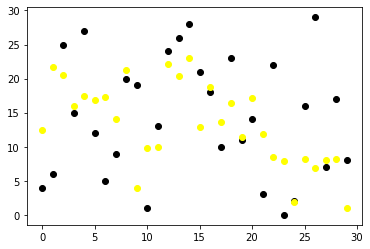

In [45]:
%matplotlib inline
plt.figure()
plt.scatter(x=list(range(0,30)),y= y,color ='black')
plt.scatter(x=list(range(0,30)),y= y_pred,color ='yellow')
plt.show()

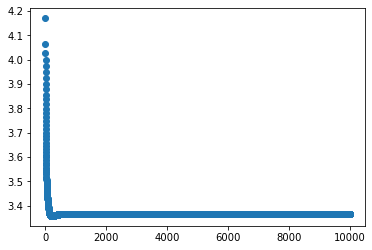

In [46]:
plt.figure()
plt.scatter(x=list(range(0,10000)),y=J)
plt.show()